### 1. Data Acquisition

#### Import Libraries

In [7]:
# data analysis and wrangling
import pandas as pd
from pandas import DataFrame, Series, qcut, crosstab
import numpy as np

In [8]:
# data exploration
from IPython.display import display
from pandas import crosstab

In [9]:
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from pywaffle import Waffle
import squarify

In [10]:
# data modeling
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Read the Data

In [11]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [12]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


### 2. Data Cleaning

#### 2.1 Check for Null and Nan Values

#### Null Values

In [14]:
df.isnull().count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

#### Nan Values

In [15]:
df.isna().count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

There was no empty numbers or empty string within the dataframe, therefore, no imputation necessary.

#### 2.2 Check for Outliers

Outliers must be removed in order to reduce inconsistencies during data exploration. Therefore, feature selection has been used to choose the features that contribute the most importance in the dataset.

#### Feature Selection

In [16]:
x = df.iloc[:, :-1] #choose all columns except death event
y = df.iloc[:, -1] #choose only death event

In [17]:
model = ExtraTreesClassifier()

In [18]:
model.fit(x, y)

ExtraTreesClassifier()

In [19]:
print(model.feature_importances_)

[0.09432566 0.02430763 0.07667651 0.03157414 0.12770691 0.02551457
 0.07458995 0.12047039 0.08260974 0.0282124  0.02583622 0.28817589]


In [20]:
#create a new dataframe for feature selection
feature_importances = pd.DataFrame({"feature": x.columns, "importance": np.round(model.feature_importances_, 3)})
feature_importances = feature_importances.sort_values('importance', ascending = False).set_index("feature")
feature_importances

,importance
feature,
time,0.288
ejection_fraction,0.128
serum_creatinine,0.120
age,0.094
serum_sodium,0.083
creatinine_phosphokinase,0.077
platelets,0.075
diabetes,0.032
sex,0.028


In [21]:
feature_importances = pd.Series(model.feature_importances_, index = x.columns)

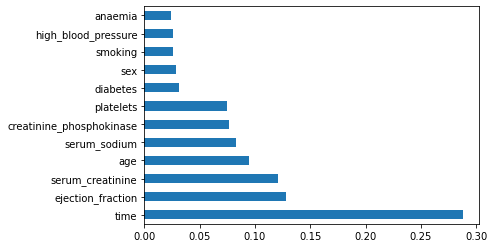

In [22]:
feature_importances.nlargest(12).plot(kind = "barh")
plt.show()

As can be seen above, time, ejection_fraction and serum_creatinine have the most impact, therefore, these three important features have been chosen in order to detect the outliers within the dataset.

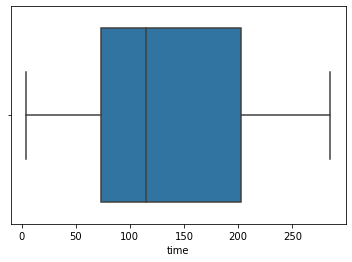

In [23]:
#detect outliers for time
sns.boxplot(x = df.time)
plt.show()

There were no outliers in time

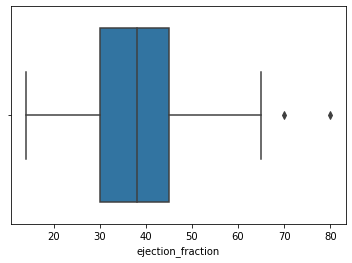

In [24]:
#detect outliers for ejection_fraction
sns.boxplot(x = df.ejection_fraction)
plt.show()

There were two outliers in ejection_fraction dataset. Therefore, they need to be removed.

In [25]:
df[df["ejection_fraction"] >= 70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [26]:
#assigning ejection_fraction < 70 data into df
df = df[df["ejection_fraction"] < 70]

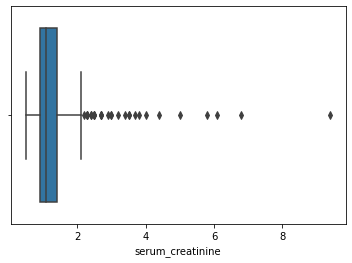

In [27]:
#detect outliers in serum_creatinine
sns.boxplot(x = df.serum_creatinine)
plt.show()

These outliers in serum_creatinine were actual datapoint to predict death_event, therefore, these outliers must not be removed.

### 3. Data Exploration (EDA)

#### 3.1 Mortality Rate among Males and Females

In [28]:
sex = df.groupby("sex")["DEATH_EVENT"].count()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12FCB5C8>],
      dtype=object)

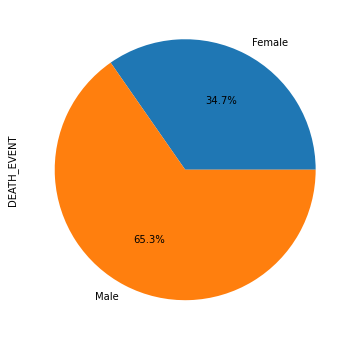

In [29]:
sex.plot.pie(subplots = True, figsize = (10, 6), autopct = "%1.1f%%", labels = ["Female", "Male"])

The overall death occured among male patients.

#### Mortality Rate Factors among Males and Females

#### 1. Males

In [30]:
diabetesm = df[(df["DEATH_EVENT"] == 1) & (df["diabetes"] == 1) & (df["sex"] == 1)]
high_blood_pressurem = df[(df["DEATH_EVENT"] == 1) & (df["high_blood_pressure"] == 1) & (df["sex"] == 1)]
smokingm = df[(df["DEATH_EVENT"] == 1) & (df["smoking"] == 1) & (df["sex"] == 1)]
anaemiam = df[(df["DEATH_EVENT"] == 1) & (df["anaemia"] == 1) & (df["sex"] == 1)]

In [31]:
labels = ["Diabetes", "HBP", "Smoking", "Anaemia"]
valuesm = [len(diabetesm), len(high_blood_pressurem), len(smokingm), len(anaemiam)]

#### 2. Females

In [32]:
diabetesf = df[(df["DEATH_EVENT"] == 1) & (df["diabetes"] == 1) & (df["sex"] == 0)]
high_blood_pressuref = df[(df["DEATH_EVENT"] == 1) & (df["high_blood_pressure"] == 1) & (df["sex"] == 0)]
smokingf = df[(df["DEATH_EVENT"] == 1) & (df["smoking"] == 1) & (df["sex"] == 0)]
anaemiaf = df[(df["DEATH_EVENT"] == 1) & (df["anaemia"] == 1) & (df["sex"] == 0)]

In [33]:
valuesf = [len(diabetesf), len(high_blood_pressuref), len(smokingf), len(anaemiaf)]

#### Graph Plot

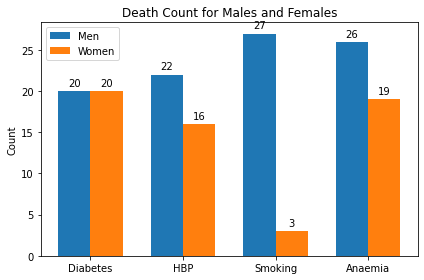

In [34]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, valuesm, width, label='Men')
rects2 = ax.bar(x + width/2, valuesf, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Death Count for Males and Females')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Mortality rate for male patients decreased due to smoking habit and for female patients due to diabetes

#### Mortality Rate for Male Smokers

In [35]:
males = df[df["sex"] == 1]

The dying age for smoker males:

In [78]:
males[(males["DEATH_EVENT"] == 1) & (males["smoking"] == 1)]["age"].mean()

68.25925925925925

The dying age for non-smoker males:

In [79]:
males[(males["DEATH_EVENT"] == 1) & (males["smoking"] == 0)]["age"].mean()

65.81905714285715

The death count for smoker males:

In [54]:
males[(males["DEATH_EVENT"] == 1) & (males["smoking"] == 1)]["age"].count()

27

The death count for non-smoker males:

In [55]:
males[(males["DEATH_EVENT"] == 1) & (males["smoking"] == 0)]["age"].count()

35

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

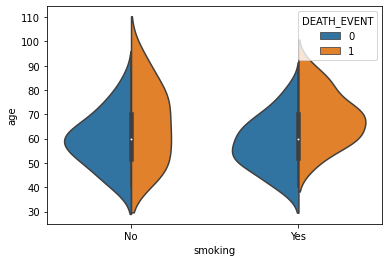

In [36]:
figure = sns.violinplot(data = males, x = "smoking", y = "age", hue = "DEATH_EVENT", split = True, bw = 0.5)
figure.set_xticklabels(["No", "Yes"])

Mortality rate for nonsmokers was at 65 years old while for smokers was 68 years old. However, there were 35 death counts for smokers while there were only 27 death counts for non-smokers.

The maximum dying age:

In [43]:
males[(males["DEATH_EVENT"] == 1) & (males["smoking"] == 1)]["age"].max()

90.0

The minimum dying age:

In [44]:
males[(males["DEATH_EVENT"] == 1) & (males["smoking"] == 1)]["age"].min()

49.0

The smokers died at the average age of 68 years old. The oldest dying age was 90 years old and the youngest dying age was 49 years old.

#### Mortality Rate for Diabetic Females

In [57]:
females = df[df["sex"] == 0]

The death count for diabetic females:

In [58]:
females[(females["DEATH_EVENT"] == 1) & (females["diabetes"] == 1)]["age"].count()

20

The death count for non-diabetic females:

In [59]:
females[(females["DEATH_EVENT"] == 1) & (females["diabetes"] == 0)]["age"].count()

13

The average dying age for diabetic females:

In [60]:
females[(females["DEATH_EVENT"] == 1) & (females["diabetes"] == 1)]["age"].mean()

59.5

The average dying age for non-diabetic females:

In [77]:
females[(females["DEATH_EVENT"] == 1) & (females["diabetes"] == 0)]["age"].mean()

66.92307692307692

The maximum dying age:

In [61]:
females[(females["DEATH_EVENT"] == 1) & (females["diabetes"] == 1)]["age"].max()

82.0

The minimum dying age:

In [62]:
females[(females["DEATH_EVENT"] == 1) & (females["diabetes"] == 1)]["age"].min()

42.0

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

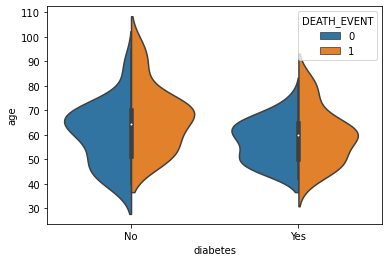

In [32]:
figure = sns.violinplot(data = females, x = "diabetes", y = "age", hue = "DEATH_EVENT", split = True, bw = 0.5)
figure.set_xticklabels(["No", "Yes"])

The mortality rate for diabetic females has been reduced from 59 years old to 66 years old. Therefore, females who were diabetic were likely to die due to heart failure 7 years younger compared to those who were not.

There were 20 death counts reported for diabetic females while there were only 13 death counts reported for non-diaebetic females. The average dying age was 59 years old.

#### 3.2 Mortality Rate among Age Group

#### Age Band- using binning method (pd.qcut)

In [67]:
df["Age Band"] = pd.qcut(df["age"], 4)
df["Age Band"].head()

0      (70.0, 95.0]
1      (51.0, 60.0]
2      (60.0, 70.0]
3    (39.999, 51.0]
4      (60.0, 70.0]
Name: Age Band, dtype: category
Categories (4, interval[float64]): [(39.999, 51.0] < (51.0, 60.0] < (60.0, 70.0] < (70.0, 95.0]]

#### Age Group

In [68]:
#assign age group
df["Age Group"] = 0
df.loc[df["age"] <= 39, "Age Group"] = 0
df.loc[(df["age"] > 39) & (df["age"] <= 51), "Age Group"] = 1
df.loc[(df["age"] > 51) & (df["age"] <= 60), "Age Group"] = 2
df.loc[(df["age"] > 60) & (df["age"] <= 70), "Age Group"] = 3
df.loc[(df["age"] > 70) & (df["age"] <= 95), "Age Group"] = 4

#### Age Band and Age Group DataFrame

In [69]:
age = df[["Age Group", "Age Band"]].sort_values(by = "Age Group")
age = age.drop_duplicates()
age.reset_index(drop = True, inplace = True)

In [70]:
age

,Age Group,Age Band
0,1,"(39.999, 51.0]"
1,2,"(51.0, 60.0]"
2,3,"(60.0, 70.0]"
3,4,"(70.0, 95.0]"


In [73]:
df.groupby(["Age Group"])["DEATH_EVENT"].mean().to_frame()

,DEATH_EVENT
Age Group,
1,0.259740
2,0.277108
3,0.247059
4,0.596154


In [71]:
pd.crosstab([df["Age Group"]], df.DEATH_EVENT, margins = True)

DEATH_EVENT,0,1,All
Age Group,,,
1,57,20,77
2,60,23,83
3,64,21,85
4,21,31,52
All,202,95,297


The highest death event (DEATH_EVENT = 1) occured among the patients who were in Age Group of 4 (between 70-95 years old).

#### Graph Plot

Graph plot has been made in order to compare the mortality rate (death count) among age group.

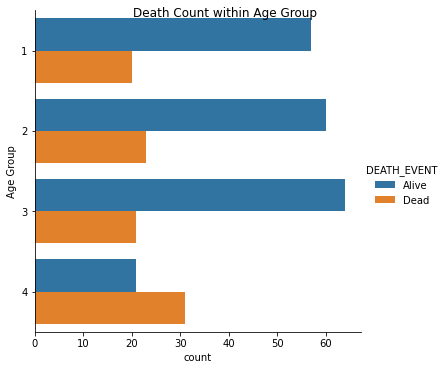

In [38]:
figure = sns.catplot(y = "Age Group", hue = "DEATH_EVENT", kind = "count", data = df)
figure.fig.suptitle("Death Count within Age Group")
figure._legend.texts[0].set_text("Alive")
figure._legend.texts[1].set_text("Dead")

Therefore, the majority of the patients admitted to hospital for heart problems were from Age Group 3 (between 70-95 years old) and contributed to high rate in death as well.

#### Mortality Rate Factors among Age Group

#### 1. Age Group 1

In [39]:
group1 = df[df["Age Group"] == 1]

In [40]:
diabetes1 = group1[(group1["DEATH_EVENT"] == 1) & (group1["diabetes"] == 1)]
high_blood_pressure1 = group1[(group1["DEATH_EVENT"] == 1) & (group1["high_blood_pressure"] == 1)]
smoking1 = group1[(group1["DEATH_EVENT"] == 1) & (group1["smoking"] == 1)]
anaemia1 = group1[(group1["DEATH_EVENT"] == 1) & (group1["anaemia"] == 1)]

In [41]:
label1 = ["Diabetes", "HBP", "Smoking", "Anaemia"]
values1 = [len(diabetes1), len(high_blood_pressure1), len(smoking1), len(anaemia1)]

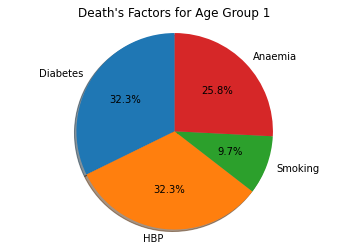

In [42]:
fig, ax1 = plt.subplots()
ax1.pie(values1, labels = label1, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.set_title("Death's Factors for Age Group 1")
ax1.axis("equal")
plt.show()

The majority of the patients from Age Group 1 (between 39-51 years old) died from heart disease due to diabetes and HBP.

#### 2. Age Group 2

In [43]:
group2 = df[df["Age Group"] == 2]

In [44]:
diabetes2 = group2[(group2["DEATH_EVENT"] == 1) & (group2["diabetes"] == 1)]
high_blood_pressure2 = group2[(group2["DEATH_EVENT"] == 1) & (group2["high_blood_pressure"] == 1)]
smoking2 = group2[(group2["DEATH_EVENT"] == 1) & (group2["smoking"] == 1)]
anaemia2 = group2[(group2["DEATH_EVENT"] == 1) & (group2["anaemia"] == 1)]

In [45]:
label2 = ["Diabetes", "HBP", "Smoking", "Anaemia"]
values2 = [len(diabetes2), len(high_blood_pressure2), len(smoking2), len(anaemia2)]

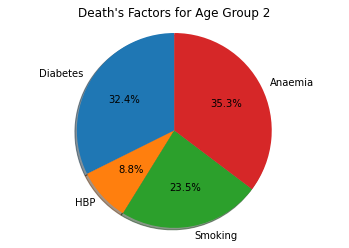

In [46]:
fig, ax2 = plt.subplots()
ax2.pie(values2, labels = label2, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax2.set_title("Death's Factors for Age Group 2")
ax2.axis("equal")
plt.show()

The majority of the patients from Age Group 2 (between 51-60 years old) died from heart disease also due to anaemia.

#### 3. Age Group 3

In [47]:
group3 = df[df["Age Group"] == 3]

In [48]:
diabetes3 = group3[(group3["DEATH_EVENT"] == 1) & (group3["diabetes"] == 1)]
high_blood_pressure3 = group3[(group3["DEATH_EVENT"] == 1) & (group3["high_blood_pressure"] == 1)]
smoking3 = group3[(group3["DEATH_EVENT"] == 1) & (group3["smoking"] == 1)]
anaemia3 = group3[(group3["DEATH_EVENT"] == 1) & (group3["anaemia"] == 1)]

In [49]:
label3 = ["Diabetes", "HBP", "Smoking", "Anaemia"]
values3 = [len(diabetes3), len(high_blood_pressure3), len(smoking3), len(anaemia3)]

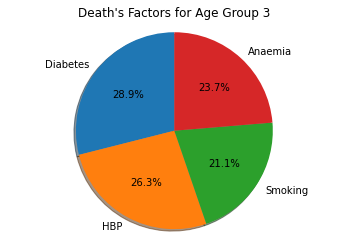

In [50]:
fig, ax3 = plt.subplots()
ax3.pie(values3, labels = label3, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax3.set_title("Death's Factors for Age Group 3")
ax3.axis("equal")
plt.show()

The majority of the patients from Age Group 3 (between 60-70 years old) died from heart disease due to diabetes.

#### 4. Age Group 4

In [51]:
group4 = df[df["Age Group"] == 4]

In [52]:
diabetes4 = group4[(group4["DEATH_EVENT"] == 1) & (group4["diabetes"] == 1)]
high_blood_pressure4 = group4[(group4["DEATH_EVENT"] == 1) & (group4["high_blood_pressure"] == 1)]
smoking4 = group4[(group4["DEATH_EVENT"] == 1) & (group4["smoking"] == 1)]
anaemia4 = group4[(group4["DEATH_EVENT"] == 1) & (group4["anaemia"] == 1)]

In [53]:
label4 = ["Diabetes", "HBP", "Smoking", "Anaemia"]
values4 = [len(diabetes4), len(high_blood_pressure4), len(smoking4), len(anaemia4)]

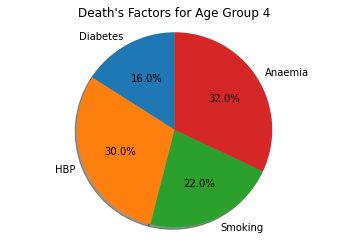

In [54]:
fig, ax4 = plt.subplots()
ax4.pie(values4, labels = label4, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax4.set_title("Death's Factors for Age Group 4")
ax4.axis("equal")
plt.show()

The majority of the patients from Age Group 1 (between 39-50 years old) died from heart disease due to Anaemia.

In [55]:
diabetes = df[(df["DEATH_EVENT"] == 1) & (df["diabetes"] == 1)]
high_blood_pressure = df[(df["DEATH_EVENT"] == 1) & (df["high_blood_pressure"] == 1)]
smoking = df[(df["DEATH_EVENT"] == 1) & (df["smoking"] == 1)]
anaemia = df[(df["DEATH_EVENT"] == 1) & (df["anaemia"] == 1)]

In [56]:
labels_overall = ["Diabetes", "HBP", "Smoking", "Anaemia"]
values_overall = [len(diabetes), len(high_blood_pressure), len(smoking), len(anaemia)]

#### Overall:

No handles with labels found to put in legend.


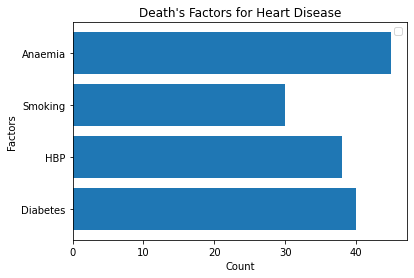

In [57]:
plt.barh(labels_overall, values_overall)
plt.legend()
plt.xlabel("Count")
plt.ylabel("Factors")
plt.title("Death's Factors for Heart Disease")
plt.show()

Therefore, anaemia and diabetes was the real culprit in causing death among the patients.

#### Mortality Rate for Anaemic

The death count for anaemic:

In [80]:
df[(df["DEATH_EVENT"] == 1) & (df["anaemia"] == 1)]["age"].count()

45

The death count for non-anaemic:

In [81]:
df[(df["DEATH_EVENT"] == 1) & (df["anaemia"] == 0)]["age"].count()

50

The average dying age for anaemic:

In [75]:
df[(df["DEATH_EVENT"] == 1) & (df["anaemia"] == 1)]["age"].mean()

66.3926

The average dying age for non-anaemic:

In [76]:
df[(df["DEATH_EVENT"] == 1) & (df["anaemia"] == 0)]["age"].mean()

64.38

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

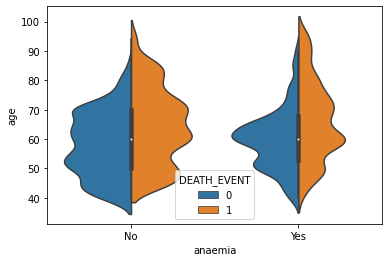

In [58]:
figure = sns.violinplot(data = df, x = "anaemia", y = "age", hue = "DEATH_EVENT", split = True, bw = 0.25)
figure.set_xticklabels(["No", "Yes"])

The mortality rate decreases from 66 years old to 64 years old for those who has anaemia. The death count for non-anaemic patients was much higher compared to anaemic patients, however, anaemia was the number one cause for death due to heart failure.

#### Mortality Rate for Diabetes

The dying age for diabetic patients:

In [83]:
df[(df["DEATH_EVENT"] == 1) & (df["diabetes"] == 1)]["age"].mean()

62.891675

The dying age for non-diabetic patients:

In [84]:
df[(df["DEATH_EVENT"] == 1) & (df["diabetes"] == 0)]["age"].mean()

67.10909090909091

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

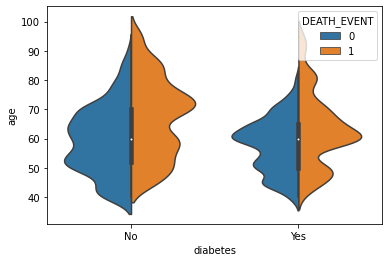

In [59]:
figure = sns.violinplot(data = df, x = "diabetes", y = "age", hue = "DEATH_EVENT", split = True, bw = 0.25)
figure.set_xticklabels(["No", "Yes"])

Overall, the mortality rate decreases from 67 years old to 62 old for those who has diabetes. Therefore, those who were diabetic were likely to die due to heart failure 5 years earlier compared to those who were not.

#### Mortality Rate for Creatinine Phosphokinase

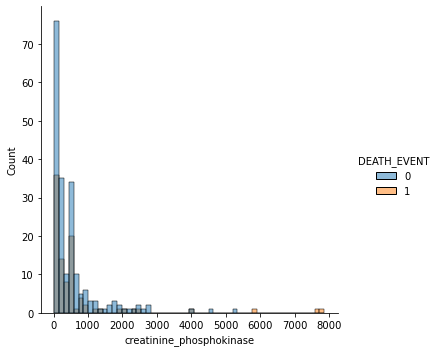

In [60]:
sns.displot(df, x = "creatinine_phosphokinase", hue = "DEATH_EVENT")

In [61]:
df["sizes"] = df.groupby(["creatinine_phosphokinase"])["DEATH_EVENT"].count()

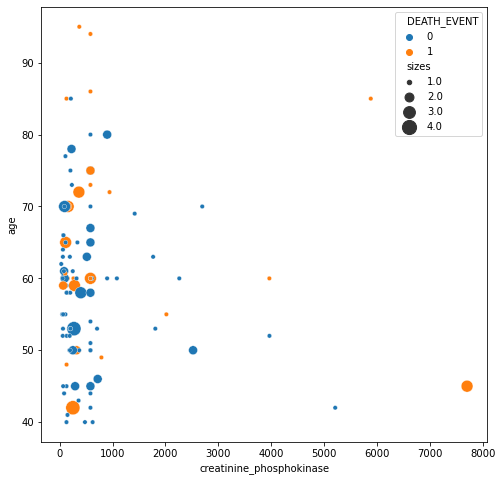

In [62]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(
    data=df, x="creatinine_phosphokinase", y = "age", hue="DEATH_EVENT", size="sizes", ax = ax,
    sizes=(20, 200), legend="full"
)

Mortality rate decreased as creatinine phosphokinase reduced to less than 1000. Creatine phosphokinase (CPK) level reduces due to heart problem. Reducing CPK leads to reduced the amount of adenosine triphosphate (ATP) produced that is needed by the heart.

#### Mortality Rate for Ejection Fraction

In [63]:
df["sizes_ef"] = df.groupby(["ejection_fraction"])["DEATH_EVENT"].count()

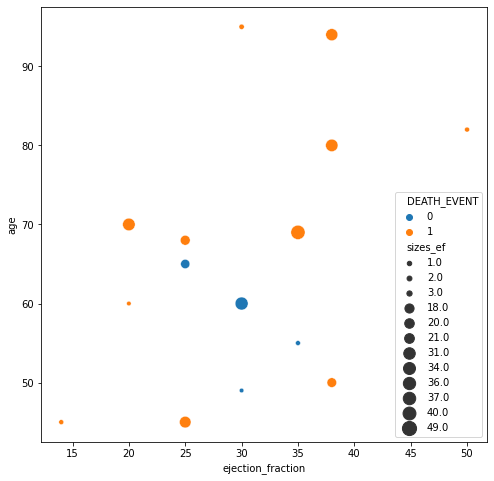

In [64]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(
    data=df, x="ejection_fraction", y = "age", hue="DEATH_EVENT", size="sizes_ef", ax = ax,
    sizes=(20, 200), legend="full"
)

Mortality rate increases for those who aged 70 years old and above.

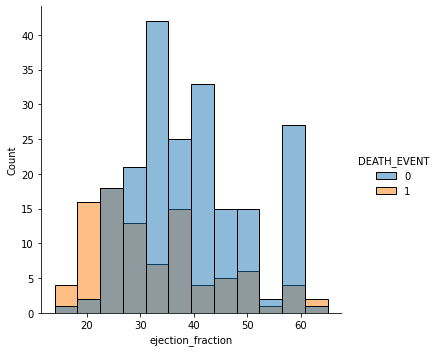

In [65]:
sns.displot(df, x = "ejection_fraction", hue = "DEATH_EVENT")

Mortality rate increases as the ejection fraction reduced to 35 and below as it indicates heart failure.

### 4. Data Modeling

#### Correlation Matrics

In [66]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age Band,Age Group,sizes,sizes_ef
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(70.0, 95.0]",4,NaN,NaN
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"(51.0, 60.0]",2,NaN,NaN


In [67]:
df_hm = df.drop(["Age Band", "sizes", "sizes_ef"], axis = 1)

In [68]:
corrm = df_hm.corr()

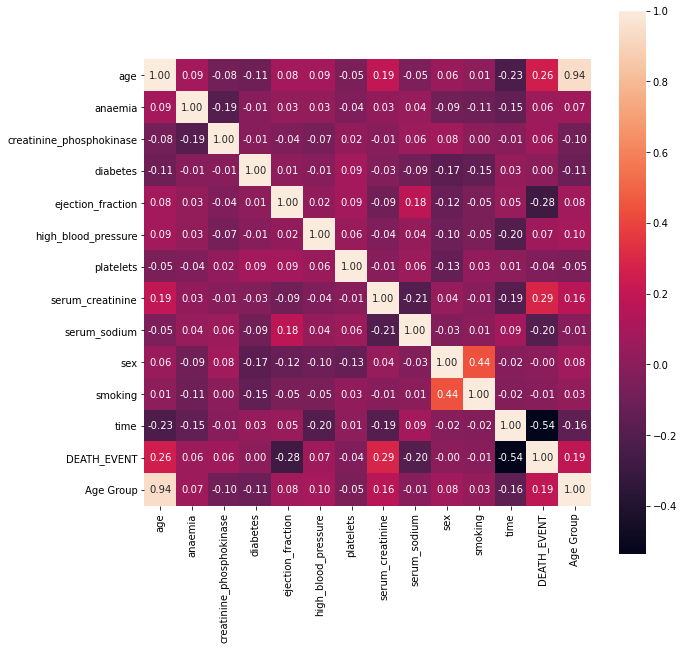

In [69]:
f, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corrm, annot = True, square = True, fmt = ".2f")
plt.show()

#### X-Data

In [70]:
X = df.drop(["DEATH_EVENT","Age Band", "sizes", "sizes_ef"], axis =1)
X.shape

(297, 13)

#### Y-Data

In [71]:
Y = df["DEATH_EVENT"]
Y.shape

(297,)

#### Train and Test Data

In [72]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,random_state=123, test_size=0.2)

In [73]:
Xtrain.shape

(237, 13)

In [74]:
Xtest.shape

(60, 13)

#### 4.1 Logistic Regression

In [75]:
logreg = LogisticRegression()

In [76]:
logreg.fit(Xtrain, ytrain) 

LogisticRegression()

In [77]:
y_logreg = logreg.predict(Xtest) 

In [78]:
y_logreg

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
acc_logreg = accuracy_score(ytest, y_logreg)
acc_logreg

0.8166666666666667

#### 4.2 SVM

In [80]:
svc = SVC()

In [81]:
svc.fit(Xtrain, ytrain)  

SVC()

In [82]:
y_svc = svc.predict(Xtest)  

In [83]:
y_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [84]:
acc_svc = accuracy_score(ytest, y_svc)
acc_svc

0.6166666666666667

#### 4.3 Random Forest

In [85]:
rf = RandomForestClassifier(n_estimators=100)

In [86]:
rf.fit(Xtrain, ytrain)  

RandomForestClassifier()

In [87]:
y_rf = rf.predict(Xtest)

In [88]:
y_rf

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [89]:
acc_rf = accuracy_score(ytest, y_rf)
acc_rf

0.8666666666666667

#### 4.4 Decision Tree

In [90]:
dt = DecisionTreeClassifier()

In [91]:
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [92]:
y_dt = dt.predict(Xtest)

In [93]:
y_dt

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [94]:
acc_dt = accuracy_score(ytest, y_dt)
acc_dt

0.8

#### 4.5 k-Nearest Neighbor

In [95]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [96]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [97]:
y_knn = knn.predict(Xtest)

In [98]:
y_knn

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [99]:
acc_knn = accuracy_score(ytest, y_knn)
acc_knn

0.5166666666666667

#### 4.6 Gaussian Naive Bayes

In [100]:
gaussian = GaussianNB()

In [101]:
gaussian.fit(Xtrain, ytrain)

GaussianNB()

In [102]:
y_gaussian = gaussian.predict(Xtest)

In [103]:
y_gaussian

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [104]:
acc_gaussian = accuracy_score(ytest, y_gaussian)
acc_gaussian

0.8

#### Comparison between Models

In [105]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_rf, acc_gaussian, acc_dt]})
models.sort_values(by='Score', ascending = False)

,Model,Score
3,Random Forest,0.866667
2,Logistic Regression,0.816667
4,Naive Bayes,0.800000
5,Decision Tree,0.800000
0,Support Vector Machines,0.616667
1,KNN,0.516667


#### Cross Validation

In [106]:
classifiers = ["Random Forest", "SVM", "Decision Tree", "KNN", "Logistic Regression", "Naive Bayes"]

In [107]:
models = [RandomForestClassifier(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors = 3), LogisticRegression(), GaussianNB()]

In [108]:
accuracy = []
mean = []
std = []

In [109]:
for i in models:
    model = i
    result = cross_val_score(model, X, Y, cv = 10, scoring = "accuracy")
    accuracy.append(result)
    mean.append(result.mean())
    std.append(result.std())

In [110]:
models_df = pd.DataFrame({"CV Mean":mean, "Std":std}, index = classifiers)

In [111]:
models_df.sort_values("CV Mean", ascending = False)

,CV Mean,Std
Logistic Regression,0.803908,0.133259
Naive Bayes,0.787126,0.085613
Random Forest,0.763908,0.151274
SVM,0.680230,0.014029
Decision Tree,0.666322,0.162932
KNN,0.592759,0.071625


Logistic regression has the highest accuracy computed using cross validation method, however, Random Forest was the higher computed using train-test-split method. There might be bias presented in the computation using train-test-split method as the dataset was faily small. The train and test sample did not have a fair distribution, therefore, there would be some important observations in test sample have not been trained.

#### Confusion Matrix

Text(0.5, 1.0, 'CM for NaiveBayes')

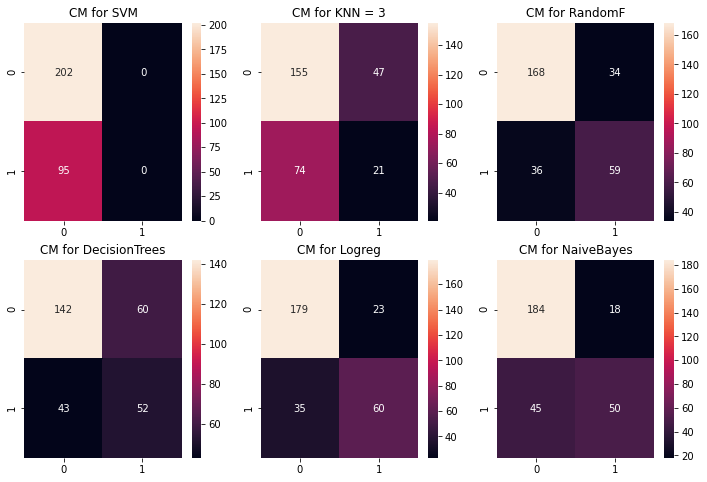

In [112]:
fig, ax = plt.subplots(2,3, figsize = (12,8))
ypred_svm = cross_val_predict(SVC(), X, Y, cv = 10)
svm_hm = sns.heatmap(confusion_matrix(Y, ypred_svm), ax = ax[0,0], annot = True, fmt = "2.0f")
ax[0,0].set_title("CM for SVM")

ypred_knn = cross_val_predict(KNeighborsClassifier(n_neighbors = 3), X, Y, cv = 10)
knn_hm = sns.heatmap(confusion_matrix(Y, ypred_knn), ax = ax[0,1], annot = True, fmt = "2.0f")
ax[0,1].set_title("CM for KNN = 3")

ypred_rf = cross_val_predict(RandomForestClassifier(), X, Y, cv = 10)
rf_hm = sns.heatmap(confusion_matrix(Y, ypred_rf), ax = ax[0,2], annot = True, fmt = "2.0f")
ax[0,2].set_title("CM for RandomF")

ypred_dt = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
dt_hm = sns.heatmap(confusion_matrix(Y, ypred_dt), ax = ax[1,0], annot = True, fmt = "2.0f")
ax[1,0].set_title("CM for DecisionTrees")

ypred_logreg = cross_val_predict(LogisticRegression(), X, Y, cv = 10)
logreg_hm = sns.heatmap(confusion_matrix(Y, ypred_logreg), ax = ax[1,1], annot = True, fmt = "2.0f")
ax[1,1].set_title("CM for Logreg")

ypred_nb= cross_val_predict(GaussianNB(), X, Y, cv = 10)
nb_hm = sns.heatmap(confusion_matrix(Y, ypred_nb), ax = ax[1,2], annot = True, fmt = "2.0f")
ax[1,2].set_title("CM for NaiveBayes")

Logistic Regression, 179 (True Positive) + 60 (True Negative) / 299 (Total) = 0.80, nearly the same as predicted value in CV Mean of cross validation.

Logistic Regression predicted for 23 alive patients to be dead and 35 dead patients to be alived.

Based on the matrixes, SVM has higher chance in correctly predicting alive patients and Random Forest has the higher chance in correctly predicting dead patients. 

#### Hyper-Parameters Tuning

In [113]:
models_df.sort_values("CV Mean", ascending = False)

,CV Mean,Std
Logistic Regression,0.803908,0.133259
Naive Bayes,0.787126,0.085613
Random Forest,0.763908,0.151274
SVM,0.680230,0.014029
Decision Tree,0.666322,0.162932
KNN,0.592759,0.071625


#### 1. Logistic Regression

In [125]:
C = np.logspace(-3,3,10)
penalty = ["l1", "l2"]
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
fit_intercept = [True, False]
hyper={'C':C, 'penalty':penalty, 'solver':solver, 'fit_intercept':fit_intercept}
gd=GridSearchCV(estimator=LogisticRegression(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Sol

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_log

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ace

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\u

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\acer\appdata\

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\ap

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\acer\appdata\local\prog

0.7914689265536723
LogisticRegression(C=0.004641588833612777, solver='newton-cg')
